# EDA on AMCAT Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To avoid Warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [4]:
df.shape

(3998, 39)

In [5]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,01-10-2011 00:00,01-10-2012 00:00,software engineer,New Delhi,m,15-04-1987 00:00,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,01-07-2013 00:00,01-07-2013 00:00,technical writer,Hyderabad,f,27-08-1992 00:00,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,01-07-2013 00:00,present,associate software engineer,Bangalore,m,03-07-1991 00:00,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,01-07-2014 00:00,01-01-2015 00:00,software developer,Asifabadbanglore,f,20-03-1992 00:00,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [7]:
print(f'{df.shape}')
df.info()

(3998, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   int64  
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64 

In [8]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [9]:
for i in df:
    print(df[i].unique())
    print()

[203097 579905 810601 ... 355888 947111 324966]

[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   55000  495000   65000
  655000  545000  520000  645000 1025000  775000  490000 1300000 3500000
  

In [10]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,01-10-2011 00:00,01-10-2012 00:00,software engineer,New Delhi,m,15-04-1987 00:00,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,01-07-2013 00:00,01-07-2013 00:00,technical writer,Hyderabad,f,27-08-1992 00:00,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,01-07-2013 00:00,present,associate software engineer,Bangalore,m,03-07-1991 00:00,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,01-07-2014 00:00,01-01-2015 00:00,software developer,Asifabadbanglore,f,20-03-1992 00:00,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [11]:
# Replace DOL column having "present" with current date


In [12]:
df['DOJ'] = pd.to_datetime(df['DOJ']).dt.date
df['DOJ']

0       2012-01-06
1       2013-01-09
2       2014-01-06
3       2011-01-07
4       2014-01-03
           ...    
3993    2011-01-10
3994    2013-01-07
3995    2013-01-07
3996    2014-01-07
3997    2013-01-02
Name: DOJ, Length: 3998, dtype: object

In [13]:
df['DOB'] = pd.to_datetime(df['DOB']).dt.date
df['DOB'] 

0       1990-02-19
1       1989-10-04
2       1992-08-03
3       1989-12-05
4       1991-02-27
           ...    
3993    1987-04-15
3994    1992-08-27
3995    1991-07-03
3996    1992-03-20
3997    1991-02-26
Name: DOB, Length: 3998, dtype: object

In [14]:
today = pd.Timestamp.today()
today

Timestamp('2024-10-03 19:57:45.280211')

In [15]:
today = pd.to_datetime('2024/10/02')
today

Timestamp('2024-10-02 00:00:00')

In [16]:
df['DOL'].replace('present', today, inplace=True)

In [17]:
df['DOL']

0       2024-10-02 00:00:00
1       2024-10-02 00:00:00
2       2024-10-02 00:00:00
3       2024-10-02 00:00:00
4          01-03-2015 00:00
               ...         
3993       01-10-2012 00:00
3994       01-07-2013 00:00
3995    2024-10-02 00:00:00
3996       01-01-2015 00:00
3997    2024-10-02 00:00:00
Name: DOL, Length: 3998, dtype: object

In [18]:
df['period'] = pd.to_datetime(df['DOL']).dt.year - pd.to_datetime(df['DOJ']).dt.year

In [19]:
df['DOB_Year'] = pd.to_datetime(df['DOB']).dt.year

In [20]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,period,DOB_Year
0,203097,420000,2012-01-06,2024-10-02 00:00:00,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12,1990
1,579905,500000,2013-01-09,2024-10-02 00:00:00,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,1989
2,810601,325000,2014-01-06,2024-10-02 00:00:00,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1992
3,267447,1100000,2011-01-07,2024-10-02 00:00:00,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13,1989
4,343523,200000,2014-01-03,01-03-2015 00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1991


In [21]:
data = df

In [22]:
data['DOB'] = pd.to_datetime(data['DOB'], dayfirst=True)
data['DOJ'] = pd.to_datetime(data['DOJ'], dayfirst=True)
data['DOL'] = pd.to_datetime(data['DOL'], dayfirst=True)

In [23]:
data['GraduationYear'].mode()[0]

2013

In [24]:
data['GraduationYear'].value_counts()

GraduationYear
2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: count, dtype: int64

In [25]:
data['GraduationYear'].replace(0, data['GraduationYear'].mode()[0], inplace=True)


In [26]:
data['GraduationYear'].value_counts()

GraduationYear
2013    1182
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
Name: count, dtype: int64

In [27]:
data['GraduationYear'] = pd.to_datetime(data['GraduationYear'])
data['GYear'] = pd.to_datetime(data['GraduationYear']).dt.year

In [28]:
data[['12graduation', 'GYear']]

,12graduation,GYear
0,2007,1970
1,2007,1970
2,2010,1970
3,2007,1970
4,2008,1970
...,...,...
3993,2006,1970
3994,2009,1970
3995,2008,1970
3996,2010,1970


In [29]:
data['12GradAge'] =  abs((pd.to_datetime(data['12graduation']).dt.year) - (pd.to_datetime(data['DOB']).dt.year))
data['GradAge'] =  abs((pd.to_datetime(data['GYear']).dt.year) - (pd.to_datetime(data['DOB']).dt.year))

# (data==0).astype('int').sum()

In [30]:
(data==0).astype('int').sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscienti

In [31]:
data.isin([-1, 'NaN']).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

In [32]:
data[data['Designation']=='get'][['Designation', 'JobCity', 'Specialization']]

,Designation,JobCity,Specialization
4,get,Manesar,electronics and communication engineering
332,get,-1,mechanical and automation
350,get,Faridabad,electrical engineering
1717,get,Hyderabad,mechanical engineering
1897,get,Hyderabad,mechanical engineering
2140,get,Indore,mechanical engineering
2318,get,Lucknow,electronics and electrical engineering
2443,get,kharagpur,mechanical engineering
2666,get,Hyderabad,electronics and electrical engineering
2757,get,Nashik,mechanical engineering


In [33]:
# Mechanical Engg.
mech = data[data['Specialization'].isin(['mechanical and automation', 'mechanical engineering'])]['Designation'].mode()[0]

# eee
eee = data[data['Specialization'].isin(['electronics and electrical engineering'])]['Designation'].mode()[0]


print(mech, '\n' ,eee)

production engineer 
 system engineer


In [34]:
data.loc[data['Specialization'].isin(['mechanical and automation', 'mechanical engineering'])]['Designation'].replace('get', mech, inplace=True)

data['Designation'].replace('get', eee, inplace=True)

In [35]:
data['JobCity'].replace('-1', 'unknown', inplace=True)
data['JobCity'] = data['JobCity'].apply(lambda x: x.strip().upper())

In [36]:
city = data['JobCity']

In [37]:
data['JobCity']  = [x.title() for x in city]

In [38]:
data['JobCity'].unique()


array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', 'Unknown',
       'Mohali', 'Jhansi', 'Delhi', 'Bhubaneswar', 'Navi Mumbai',
       'Mumbai', 'New Delhi', 'Mangalore', 'Rewari', 'Gaziabaad',
       'Bhiwadi', 'Mysore', 'Rajkot', 'Greater Noida', 'Jaipur', 'Thane',
       'Maharajganj', 'Thiruvananthapuram', 'Punchkula', 'Bhubaneshwar',
       'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum', 'Gandhi Nagar',
       'Una', 'Daman And Diu', 'Gurgoan', 'Vsakhapttnam', 'Nagpur',
       'Bhagalpur', 'New Delhi - Jaisalmer', 'Ahmedabad', 'Kochi/Cochin',
       'Bankura', 'Bengaluru', 'Kanpur', 'Vijayawada', 'Kochi', 'Beawar',
       'Alwar', 'Siliguri', 'Raipur', 'Bhopal', 'Faridabad', 'Jodhpur',
       'Udaipur', 'Muzaffarpur', 'Kolkata`', 'Bulandshahar', 'Haridwar',
       'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
       'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Vizag', 'Nouda',
       'D

In [39]:
data['JobCity'] = data['JobCity'].replace('A-64,Sec-64,Noida', 'Noida')


In [40]:
data[data['JobCity']=='A-64,SEC-64,NOIDA']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,period,DOB_Year,GYear,12GradAge,GradAge


In [41]:
data['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', 'Unknown',
       'Mohali', 'Jhansi', 'Delhi', 'Bhubaneswar', 'Navi Mumbai',
       'Mumbai', 'New Delhi', 'Mangalore', 'Rewari', 'Gaziabaad',
       'Bhiwadi', 'Mysore', 'Rajkot', 'Greater Noida', 'Jaipur', 'Thane',
       'Maharajganj', 'Thiruvananthapuram', 'Punchkula', 'Bhubaneshwar',
       'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum', 'Gandhi Nagar',
       'Una', 'Daman And Diu', 'Gurgoan', 'Vsakhapttnam', 'Nagpur',
       'Bhagalpur', 'New Delhi - Jaisalmer', 'Ahmedabad', 'Kochi/Cochin',
       'Bankura', 'Bengaluru', 'Kanpur', 'Vijayawada', 'Kochi', 'Beawar',
       'Alwar', 'Siliguri', 'Raipur', 'Bhopal', 'Faridabad', 'Jodhpur',
       'Udaipur', 'Muzaffarpur', 'Kolkata`', 'Bulandshahar', 'Haridwar',
       'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
       'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Vizag', 'Nouda',
       'D

In [42]:
data['JobCity'].mode()

0    Bangalore
Name: JobCity, dtype: object

In [43]:
data["JobCity"].replace("Unknown",'Bangalore',inplace=True)

In [44]:
665+466

1131

In [45]:
data['JobCity'].value_counts()

JobCity
Bangalore           1126
Noida                390
Hyderabad            368
Pune                 327
Chennai              313
                    ... 
Asansol                1
India                  1
Bhagalpur              1
Bikaner                1
Asifabadbanglore       1
Name: count, Length: 230, dtype: int64

In [46]:
board_10 = data['10board'].unique()
board_10.sort()

In [47]:
cbse_board = []
icse_board = []
state_board = []

for value in board_10:
      if value.startswith('cb') or value.startswith('central board of secondary education'):
        cbse_board.append(value)
      elif value.startswith('ic') or value.startswith('icse') or value.startswith('new delhi'):
        icse_board.append(value)
      else:
        state_board.append(value)  
          

In [48]:
cbse_board

['cbsc',
 'cbse',
 'cbse ',
 'cbse board',
 'cbse[gulf zone]',
 'central board of secondary education',
 'central board of secondary education, new delhi']

In [49]:
# for value in board_10:
#       if value.startswith('ic') or value.startswith('icse') or value.startswith('new delhi'):
#         icse_board.append(value)

In [50]:
icse_board

['icse', 'icse board', 'icse board , new delhi']

In [51]:
state_board

['0',
 'aisse',
 'andhra pradesh board ssc',
 'andhra pradesh state board',
 'anglo indian',
 'ap state board',
 'ap state board for secondary education',
 'apsche',
 'apssc',
 'aurangabad board',
 'bharathi matriculation school',
 'bihar',
 'bihar board',
 'bihar examination board, patna',
 'bihar school examination board',
 'bihar school examination board patna',
 'bihar secondary education board,patna',
 'biharboard',
 'board of  secondary education',
 'board of high school and intermediate education uttarpradesh',
 'board of intermediate education',
 'board of school education harayana',
 'board of school education haryana',
 'board of school education uttarakhand',
 'board of secendary education orissa',
 'board of secondaray education',
 'board of secondary education',
 'board of secondary education (bse) orissa',
 'board of secondary education - andhra pradesh',
 'board of secondary education orissa',
 'board of secondary education rajasthan',
 'board of secondary education(bse)

In [52]:
for i in state_board:
    data['10board'].replace(i, 'State Board', inplace=True)

In [53]:
for j in cbse_board:
    data['10board'].replace(j, 'CBSE', inplace=True)

In [54]:
for k in icse_board:
    data['10board'].replace(k, 'ICSE', inplace=True)

In [55]:
data['10board'].replace('0', data['10board'].mode()[0], inplace=True)

In [56]:
data['12board']

0       board of intermediate education,ap
1                                     cbse
2                                     cbse
3                                     cbse
4                                     cbse
                       ...                
3993                                  cbse
3994                           state board
3995                           chse,odisha
3996                           state board
3997                                  cbse
Name: 12board, Length: 3998, dtype: object

In [57]:
data['12board'] = data['12board'].apply(lambda x: x.strip())

In [58]:
data['12board'] 

0       board of intermediate education,ap
1                                     cbse
2                                     cbse
3                                     cbse
4                                     cbse
                       ...                
3993                                  cbse
3994                           state board
3995                           chse,odisha
3996                           state board
3997                                  cbse
Name: 12board, Length: 3998, dtype: object

In [59]:
board_12 = data['12board'].unique()
board_12.sort()

In [60]:
cbse_board_12 = []
icse_board_12 = []
state_board_12 = []

for value in board_12:
      if value.startswith('cb') or value.startswith('central board of secondary education'):
        cbse_board_12.append(value)
      elif value.startswith('ic') or value.startswith('is') or value.startswith('ci'):
        icse_board_12.append(value)
      else:
        state_board_12.append(value) 

In [61]:
state_board_12

['0',
 'ahsec',
 'aissce',
 'aligarh muslim university',
 'all india board',
 'amravati divisional board',
 'andhpradesh board of intermediate education',
 'andhra board',
 'andhra pradesh',
 'andhra pradesh board of secondary education',
 'andhra pradesh state board',
 'ap board',
 'ap board for intermediate education',
 'ap intermediate board',
 'apbie',
 'apbsc',
 'apsb',
 'aurangabad board',
 'baord of intermediate education',
 'bciec,patna',
 'bice',
 'bie',
 'bieap',
 'biec',
 'biec patna',
 'biec, patna',
 'biec,patna',
 'biec-patna',
 'bihar',
 'bihar board',
 'bihar intermediate education council',
 'bihar intermediate education council, patna',
 'bihar school examination board patna',
 'board fo intermediate education, ap',
 'board of high school and intermediate education uttarpradesh',
 'board of higher secondary examination, kerala',
 'board of higher secondary orissa',
 'board of intermeadiate education',
 'board of intermediate',
 'board of intermediate ap',
 'board of i

In [62]:

for i in state_board_12:
    data['12board'].replace(i, 'State Board', inplace=True)

In [63]:
for j in cbse_board_12:
    data['12board'].replace(j, 'CBSE', inplace=True)

In [64]:
for k in icse_board_12:
    data['12board'].replace(k, 'ICSE', inplace=True)

In [65]:
data['12board'].unique()

array(['State Board', 'CBSE', 'ICSE'], dtype=object)

In [66]:
data['12board'].mode()[0]

'State Board'

In [67]:
data['12board'] = data['12board'].replace('0', data['12board'].mode()[0])

In [68]:
data['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [69]:
data['Domain'].replace(-1, data['Domain'].median(), inplace=True)

## Univariate Analysis

In [70]:
data['Salary'].min()

35000

<Axes: xlabel='Salary', ylabel='Count'>

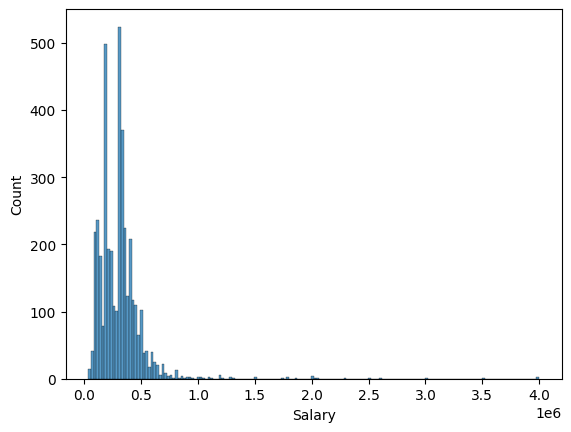

In [71]:
sns.histplot(data=data, x='Salary')

<Axes: xlabel='Salary', ylabel='Density'>

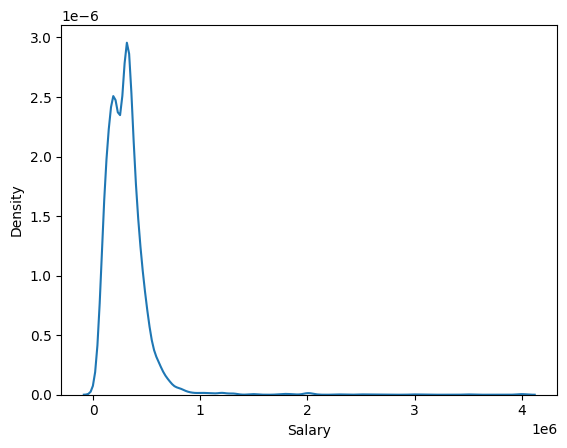

In [72]:
sns.kdeplot(data=data, x='Salary')

In [73]:
data[data['Salary'] <= 50000]['Salary'] *= 12

In [74]:
data['Salary']

0        420000
1        500000
2        325000
3       1100000
4        200000
         ...   
3993     280000
3994     100000
3995     320000
3996     200000
3997     400000
Name: Salary, Length: 3998, dtype: int64

<Axes: ylabel='Frequency'>

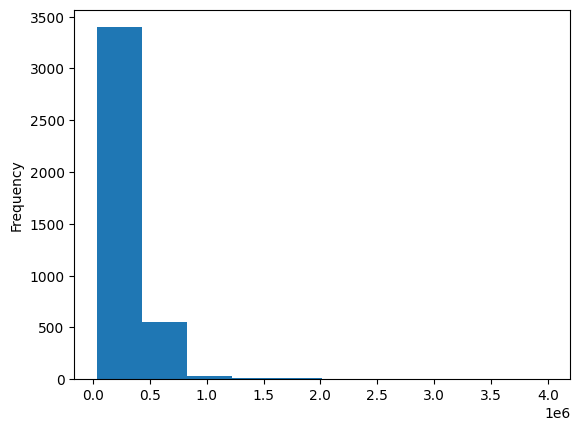

In [75]:
data['Salary'].plot(kind='hist')

<Axes: ylabel='Frequency'>

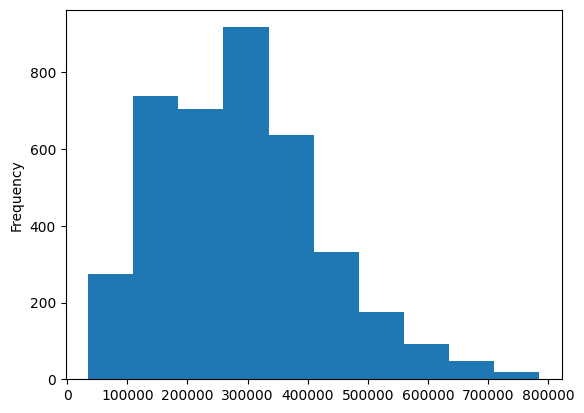

In [76]:
data[data['Salary']< 800000]['Salary'].plot(kind='hist')

In [77]:
data[['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']]

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,445,-1,-1,-1,-1,-1,-1
1,-1,466,-1,-1,-1,-1,-1
2,395,-1,-1,-1,-1,-1,-1
3,615,-1,-1,-1,-1,-1,-1
4,-1,233,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
3993,345,-1,-1,-1,-1,-1,-1
3994,325,420,-1,-1,-1,-1,-1
3995,405,-1,-1,-1,-1,-1,-1
3996,445,-1,438,-1,-1,-1,-1


<Figure size 1500x500 with 0 Axes>

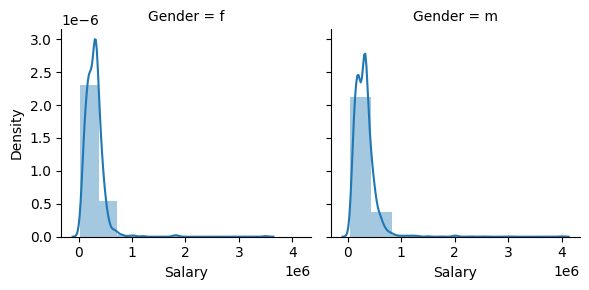

In [78]:
plt.figure(figsize=(15,5))
colors = sns.color_palette('bright',n_colors=2)
sns.FacetGrid(data, col="Gender", palette=colors).map(sns.distplot, "Salary",bins=10)
plt.show()

In [79]:
def feature_cleaning(input_val, input_list):
  if type(input_val) == str:
    for item in [i for i in input_list if len(i.split()) > 1]:
      if all([x in input_val for x in item.split()]):
        return item.title()
          
    for item in [i for i in input_list if len(i.split()) == 1]:
      if item in input_val:
        return item.title()
    if 'engineer' in input_val:
      return 'Hardware Engineer'
    try:
      matched_item = get_close_matches(input_val, input_list)[0]
      return matched_item.title()
    except:
      return 'Other'
        
  else:
    return np.nan

In [80]:
roles_list = ['software engineer', 'system engineer', 'developer', 'analyst', 'test engineer', 'dba', 
            'administrator', 'customer service', 'quality engineer', 'quality', 'automation engineer',
            'network engineer', 'support', 'it engineer', 'manager', 'management', 'programmer', 
            'tester', 'qa engineer', 'design']

In [81]:
data['Job_Role'] = data['Designation'].apply(lambda x: feature_cleaning(x, roles_list))
jr_sorted = data['Job_Role'].unique()
jr_sorted.sort()
jr_sorted

array(['Administrator', 'Analyst', 'Automation Engineer',
       'Customer Service', 'Dba', 'Design', 'Developer',
       'Hardware Engineer', 'It Engineer', 'Management', 'Manager',
       'Network Engineer', 'Other', 'Programmer', 'Qa Engineer',
       'Quality', 'Quality Engineer', 'Software Engineer', 'Support',
       'System Engineer', 'Test Engineer', 'Tester'], dtype=object)

In [82]:
data['Job_Role'] = data['Job_Role'].replace({'It Engineer': 'Software Engineer', 'Network Engineer': 'System Engineer', 'Dba': 'System Engineer',
                                   'Support': 'Administrator', 'Customer Service': 'Administrator',
                                   'Tester': 'Test Engineer', 'Qa Engineer': 'Test Engineer', 'Quality': 'Test Engineer', 
                                   'Quality Engineer': 'Test Engineer', 'Automation Engineer': 'Test Engineer', 
                                   'Programmer': 'Developer', 'Management': 'Manager', 'Design': 'Other'})

In [83]:
data['Job_Role'].value_counts(dropna=False)

Job_Role
Software Engineer    941
Developer            753
System Engineer      491
Hardware Engineer    466
Analyst              411
Other                399
Administrator        197
Test Engineer        180
Manager              160
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Job_Role'>

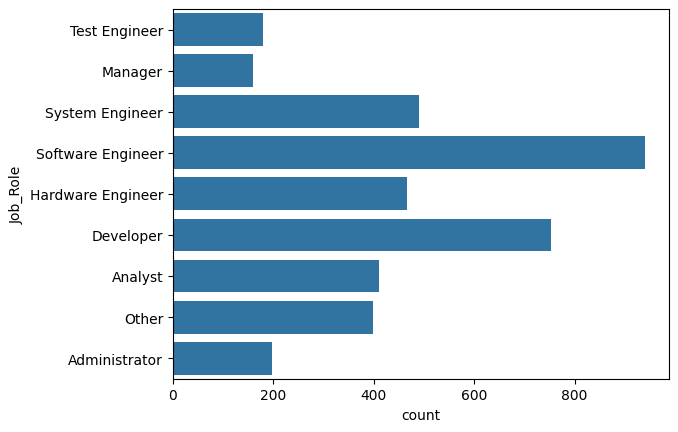

In [84]:
sns.countplot(data['Job_Role'])

In [85]:
jobcity_count = data['JobCity'].value_counts().head()
jobcity_count

JobCity
Bangalore    1126
Noida         390
Hyderabad     368
Pune          327
Chennai       313
Name: count, dtype: int64

<Axes: xlabel='JobCity', ylabel='count'>

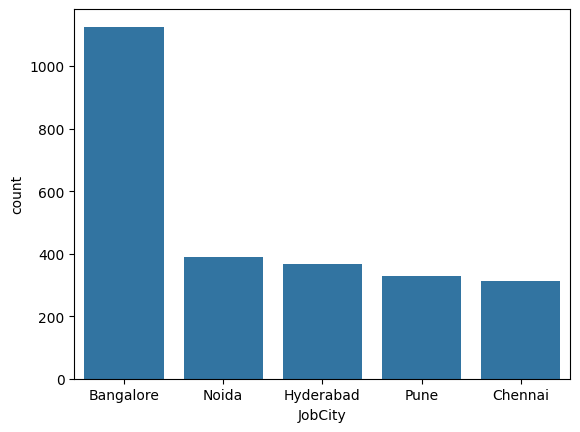

In [86]:
sns.barplot(jobcity_count)

<Axes: xlabel='count', ylabel='Gender'>

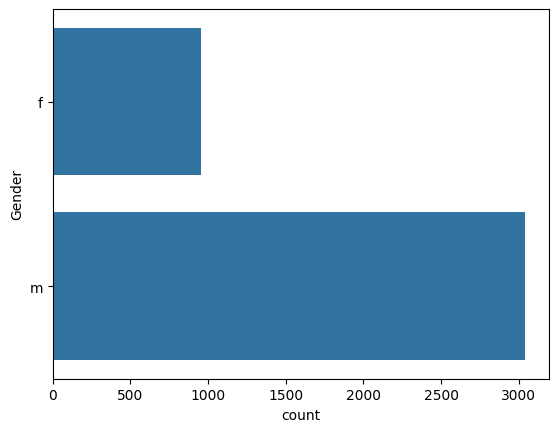

In [87]:
sns.countplot(data['Gender'])

In [88]:
Specialization_count= data['Specialization'].value_counts().head(10)
Specialization_count

Specialization
electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: count, dtype: int64

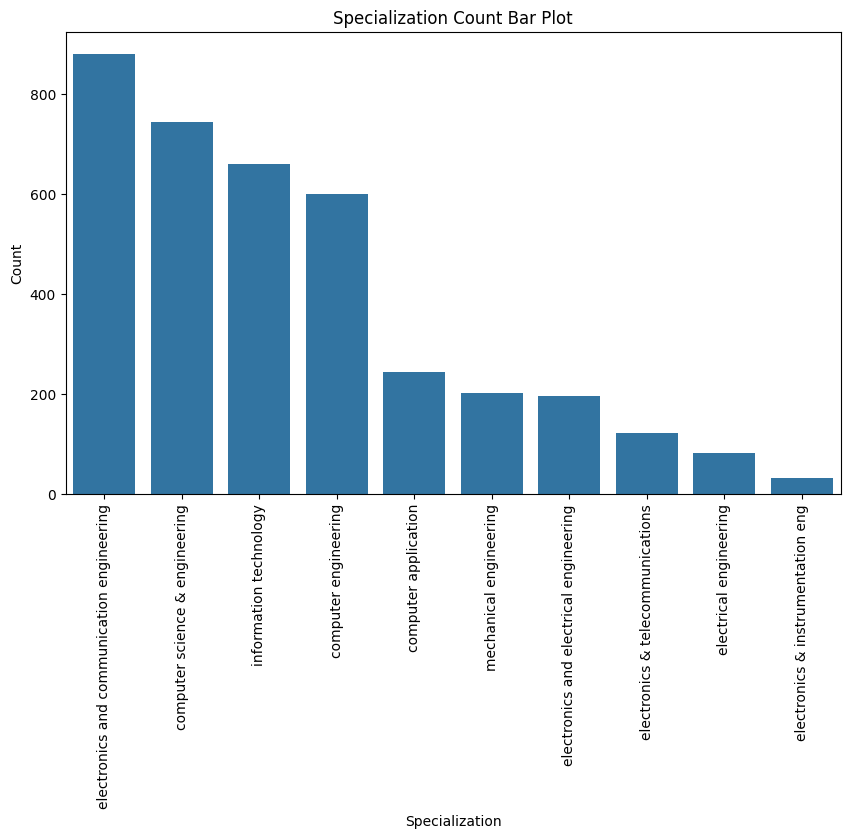

In [89]:
plt.figure(figsize=(10,6))  
sns.barplot(x=Specialization_count.index, y=Specialization_count.values)

plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Specialization Count Bar Plot')
plt.xticks(rotation=90)  


plt.show()

<Axes: xlabel='count', ylabel='10board'>

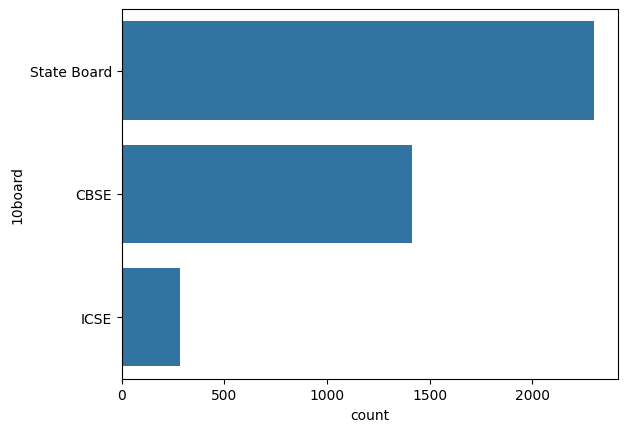

In [90]:
sns.countplot(data['10board'])

<Axes: xlabel='count', ylabel='12board'>

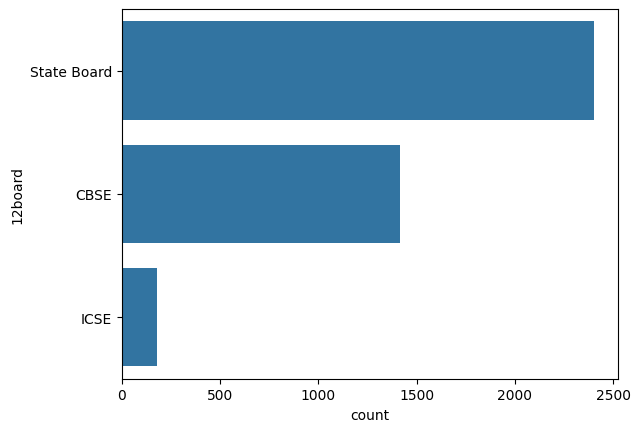

In [91]:
sns.countplot(data['12board'])

In [92]:
data['GradAge'].mode()

0    21
Name: GradAge, dtype: int32

In [93]:
data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'period', 'DOB_Year', 'GYear', '12GradAge', 'GradAge', 'Job_Role'],
      dtype='object')

In [94]:
len(data.columns)

44

In [95]:
amcat_scores = data.iloc[:,22:38]

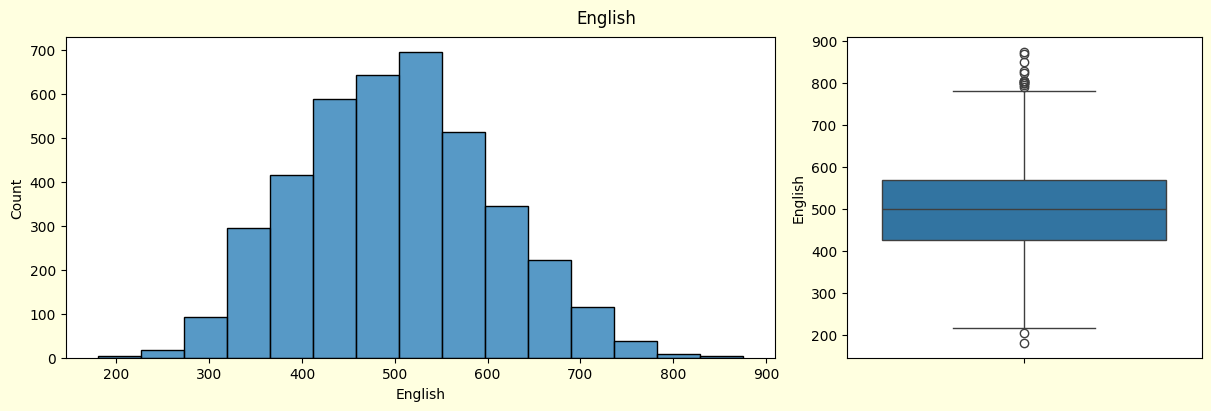

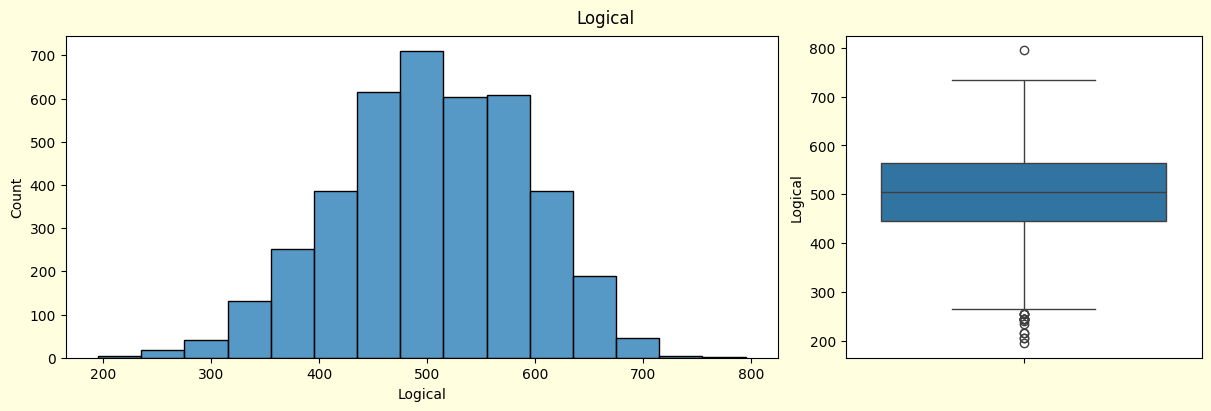

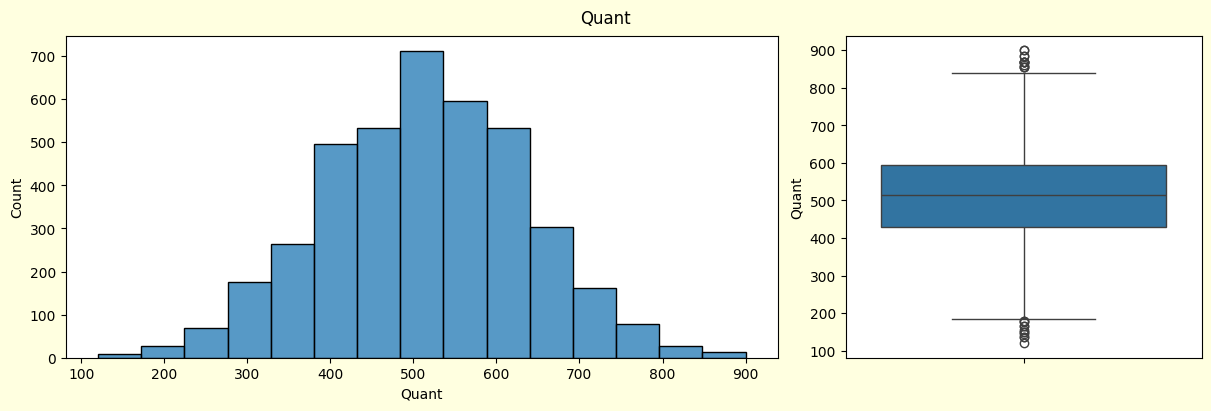

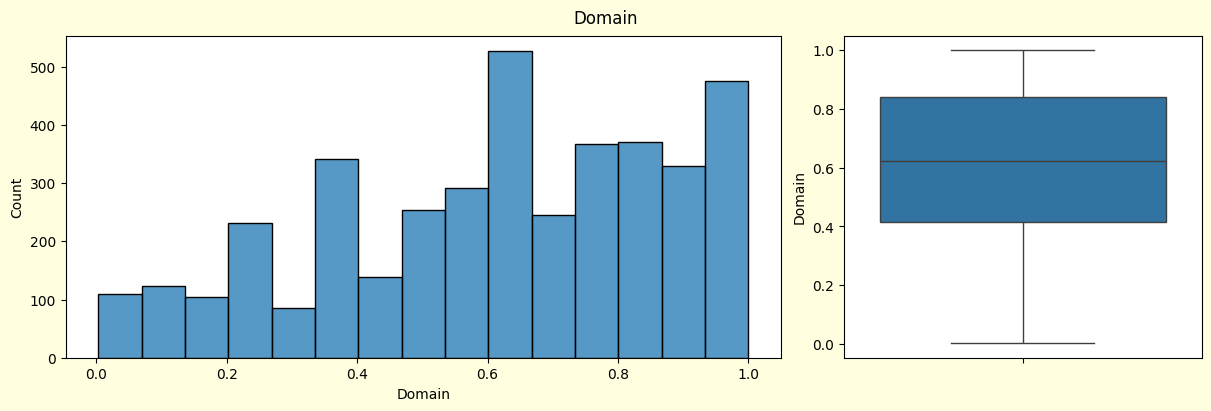

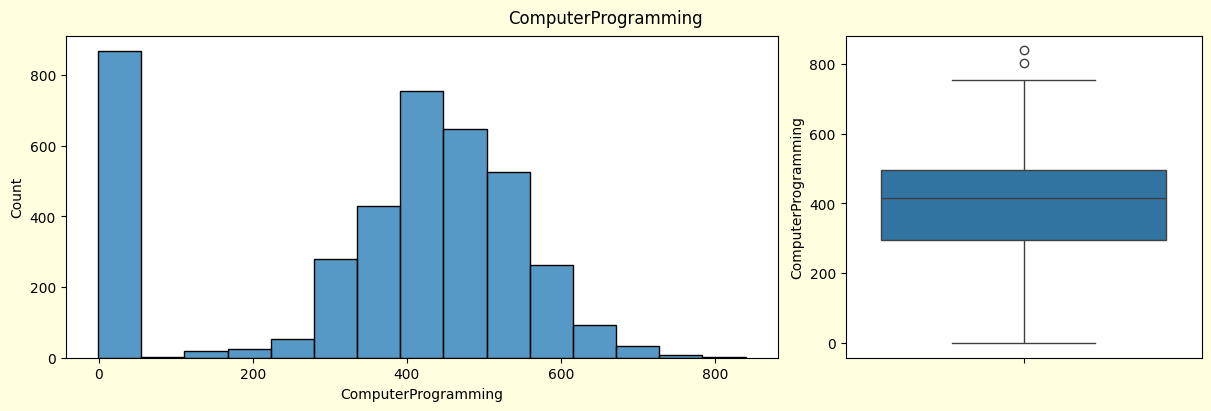

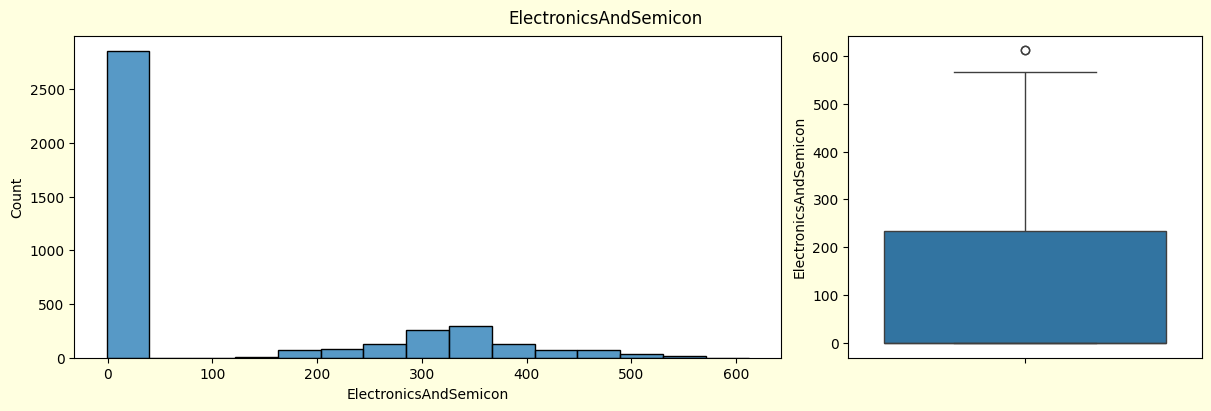

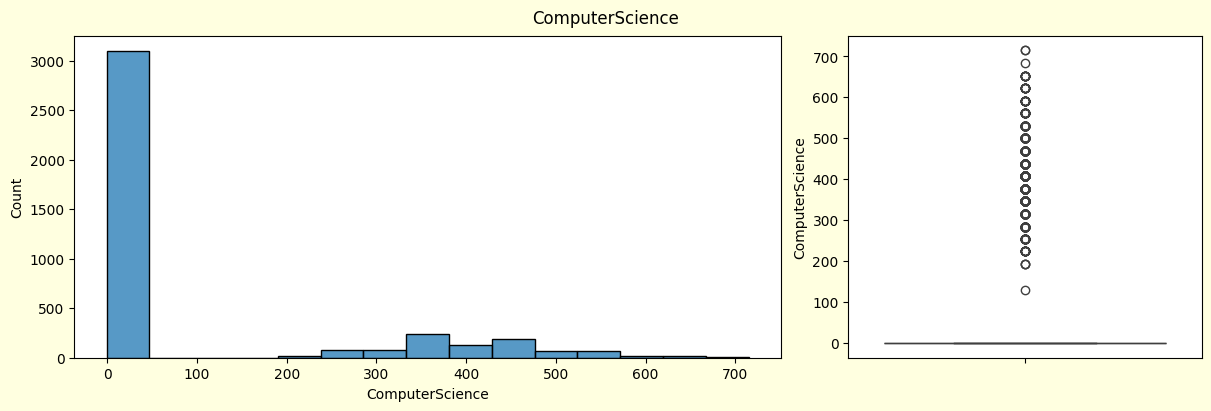

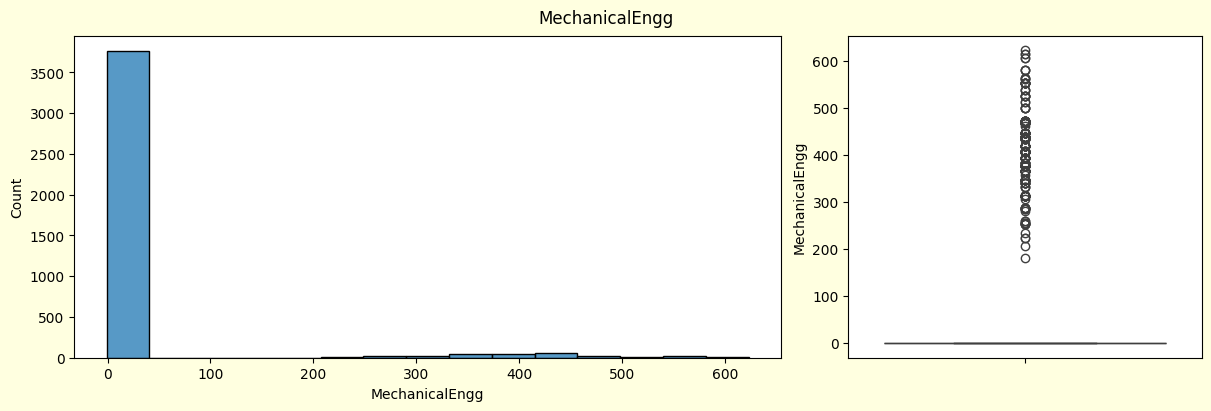

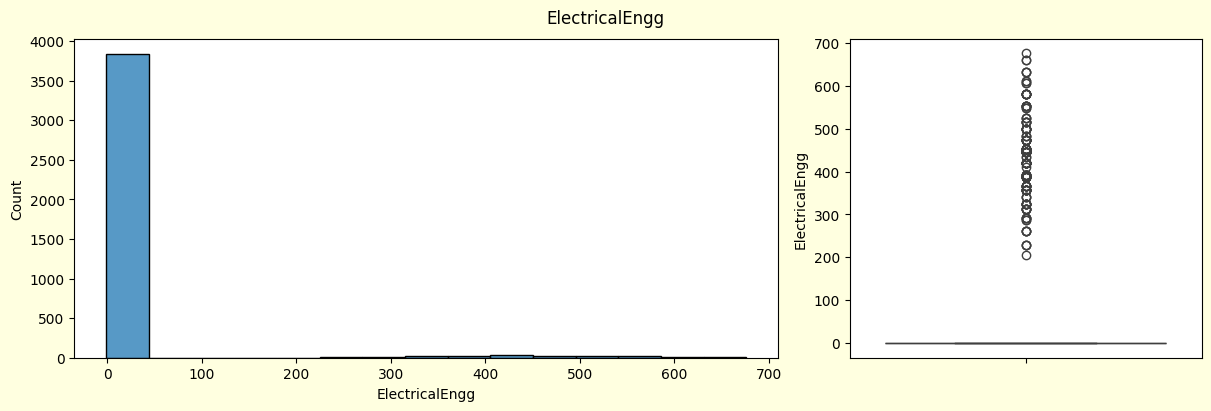

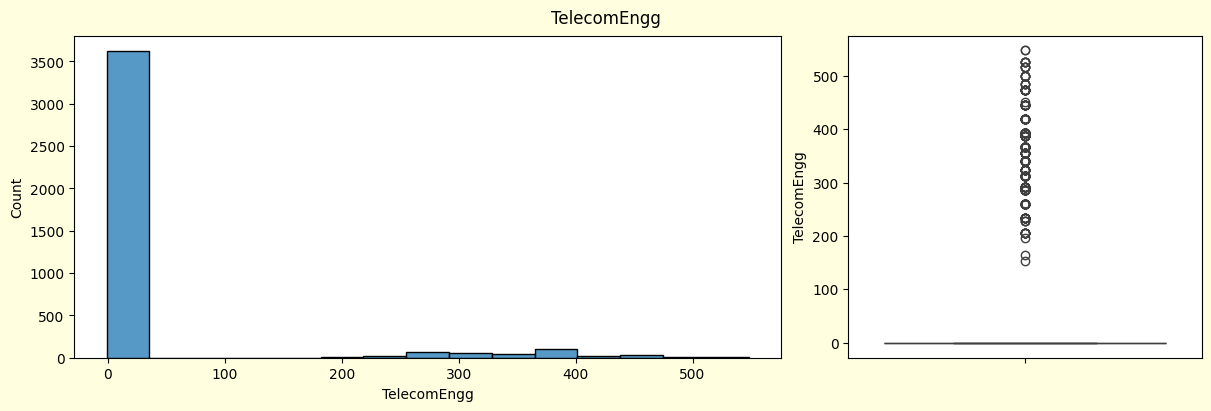

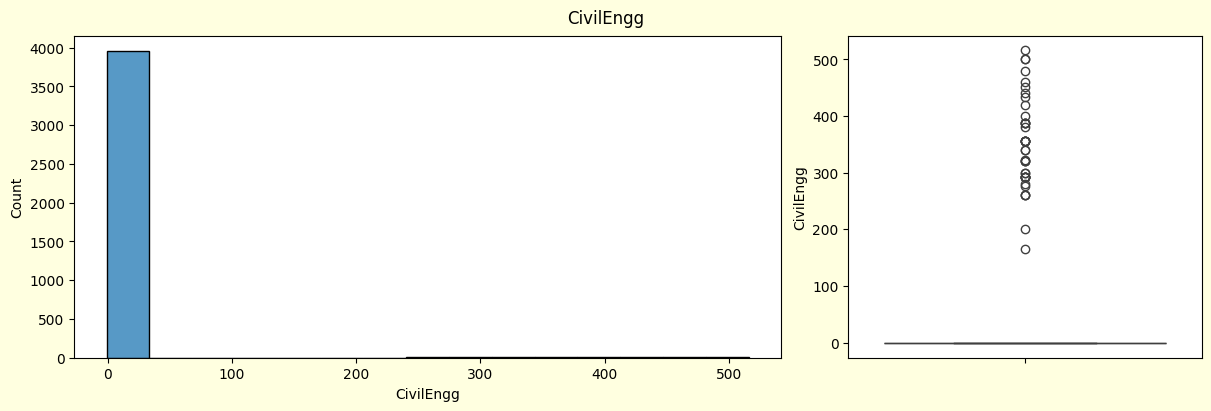

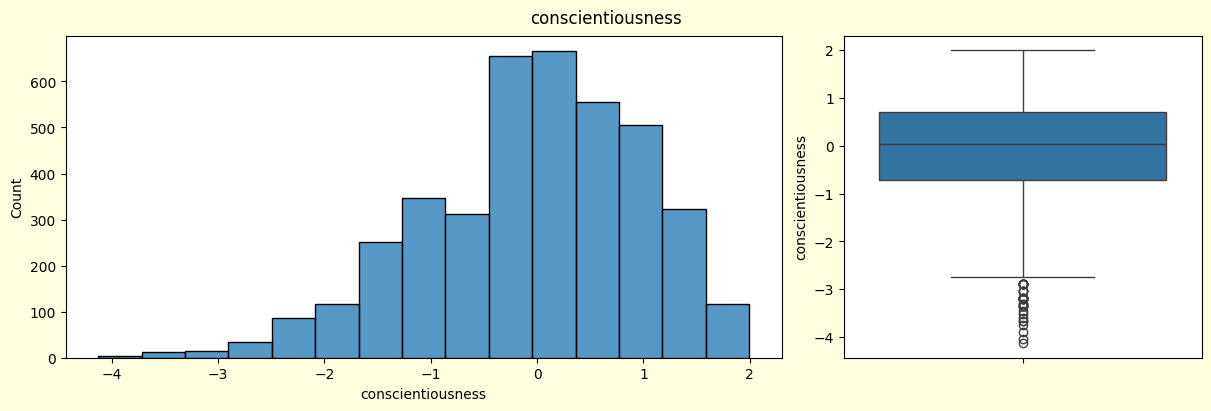

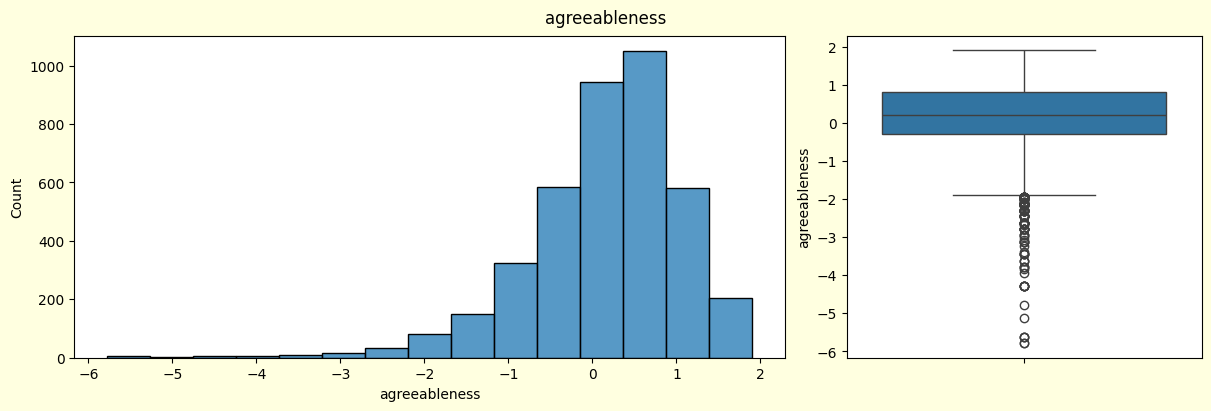

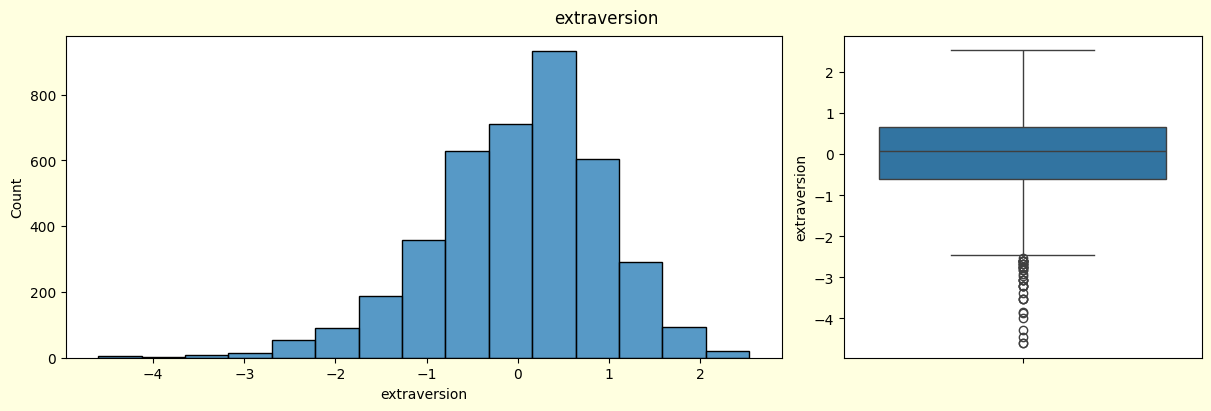

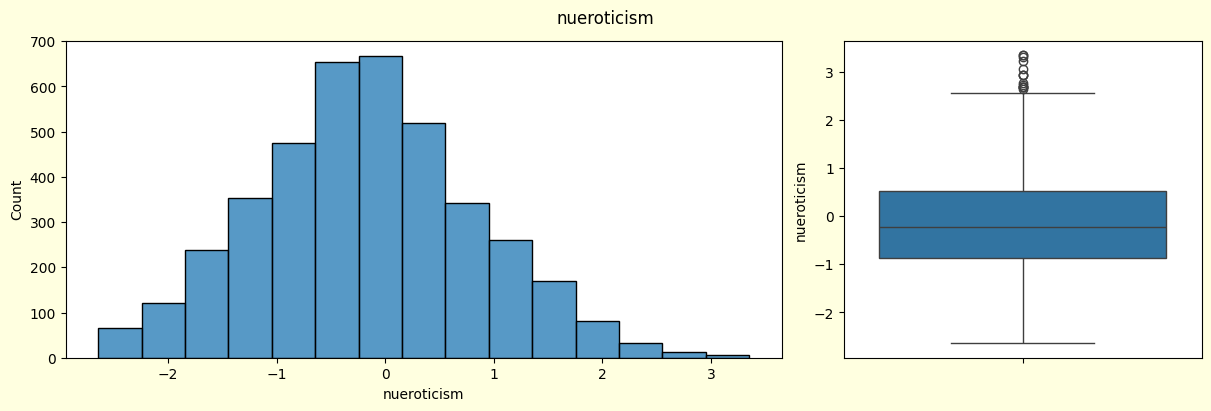

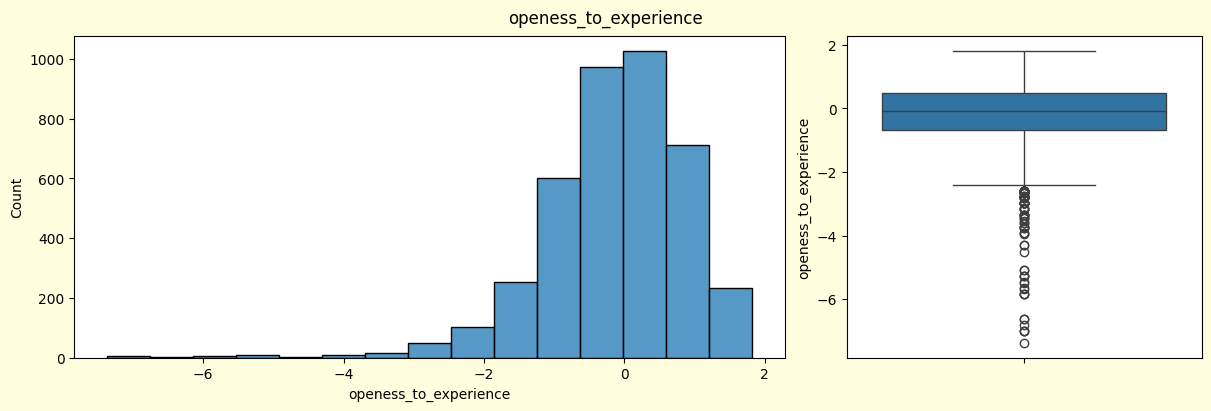

In [96]:
for col in amcat_scores: 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True, facecolor='lightyellow', gridspec_kw={'width_ratios': [4, 2]}) 
    sns.histplot(data[col], ax=ax1, bins=15) 
    sns.boxplot(data[col], ax=ax2) 
    plt.suptitle(col) 
    plt.show()

<Axes: xlabel='12graduation'>

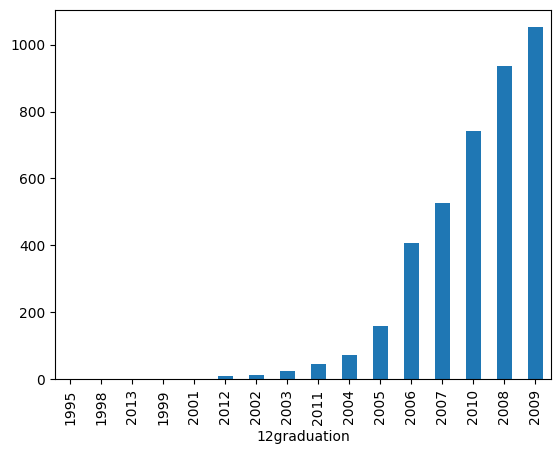

In [97]:
data['12graduation'].value_counts().sort_values().plot(kind='bar')

<Axes: xlabel='count', ylabel='CollegeState'>

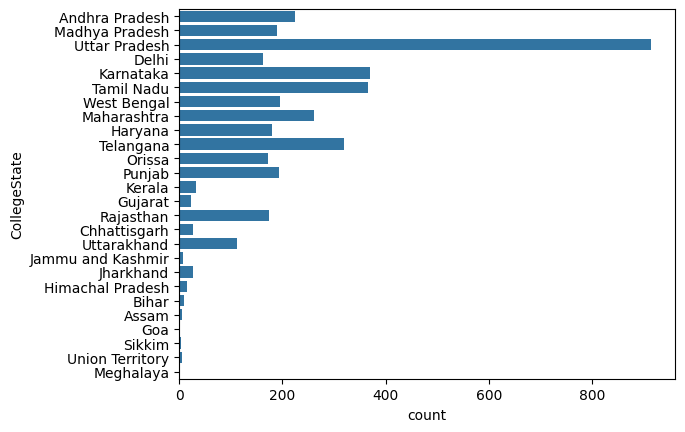

In [98]:
sns.countplot(data['CollegeState'])

<Axes: xlabel='count', ylabel='Degree'>

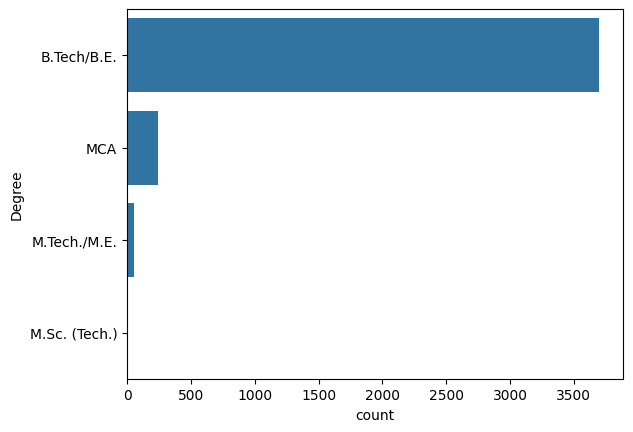

In [99]:
sns.countplot(data['Degree'])

## data['DOB'].dt.year.value_counts().plot(kind='barh')

<Axes: ylabel='DOB'>

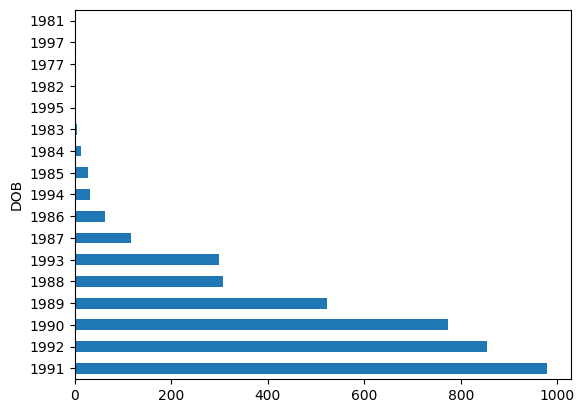

In [100]:
data['DOB'].dt.year.value_counts().plot(kind='barh')

<Axes: ylabel='DOJ'>

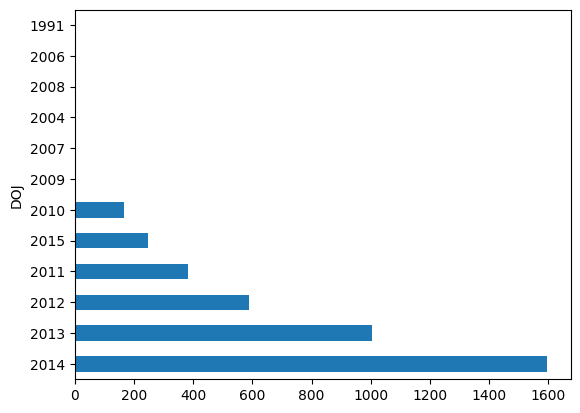

In [101]:
data['DOJ'].dt.year.value_counts().plot(kind='barh')

<Axes: ylabel='DOL'>

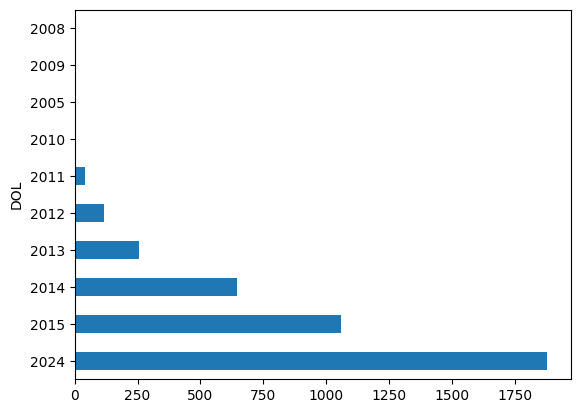

In [102]:
data['DOL'].dt.year.value_counts().plot(kind='barh')

## Bi Variate Analysis 

In [103]:
data['Specialization'].value_counts()

Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical enginee

<Axes: xlabel='Specialization', ylabel='count'>

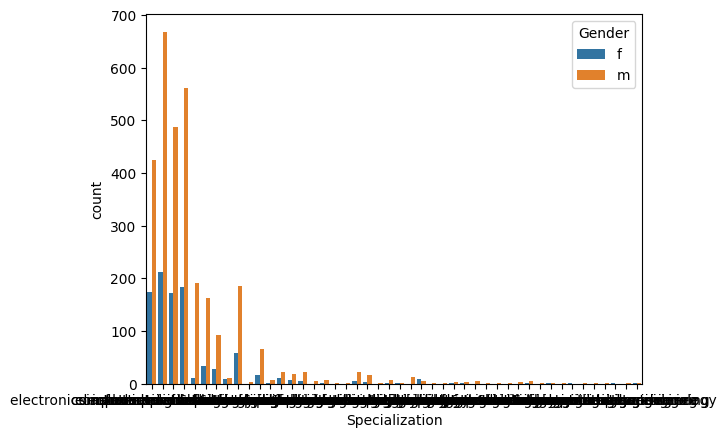

In [104]:
sns.countplot(data=data, x='Specialization', hue='Gender')

In [105]:
data.groupby('Gender')['10percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,80.932894,8.848698,48.8,75.00,82.4,87.63,97.12
m,3041.0,76.979000,9.960078,43.0,70.66,78.0,85.00,97.76


<Axes: xlabel='Degree', ylabel='count'>

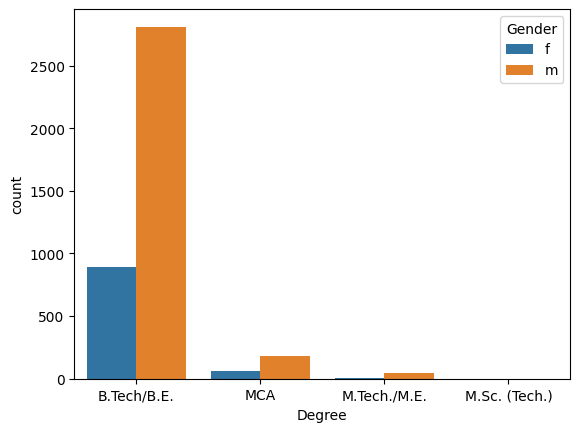

In [106]:
sns.countplot(data=data, x='Degree', hue='Gender')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Test Engineer'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'System Engineer'),
  Text(3, 0, 'Software Engineer'),
  Text(4, 0, 'Hardware Engineer'),
  Text(5, 0, 'Developer'),
  Text(6, 0, 'Analyst'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Administrator')])

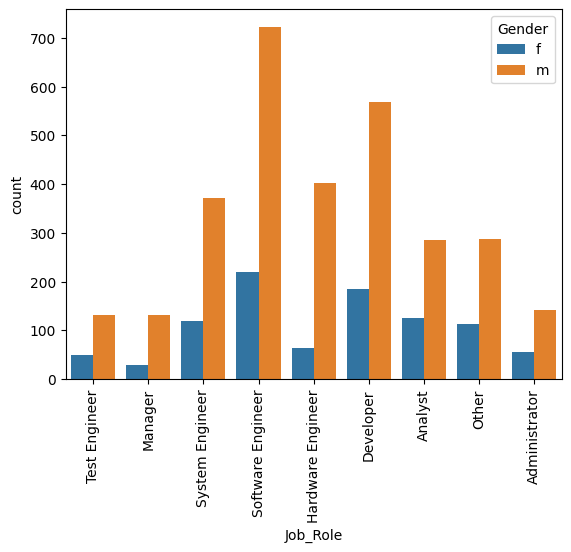

In [107]:
sns.countplot(data=data, x='Job_Role', hue='Gender')
plt.xticks(rotation=90)

****************************** Gender Vs English ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,501.91,100.66,250.0,430.0,500.0,570.0,870.0
m,3041.0,501.57,106.27,180.0,425.0,500.0,570.0,875.0


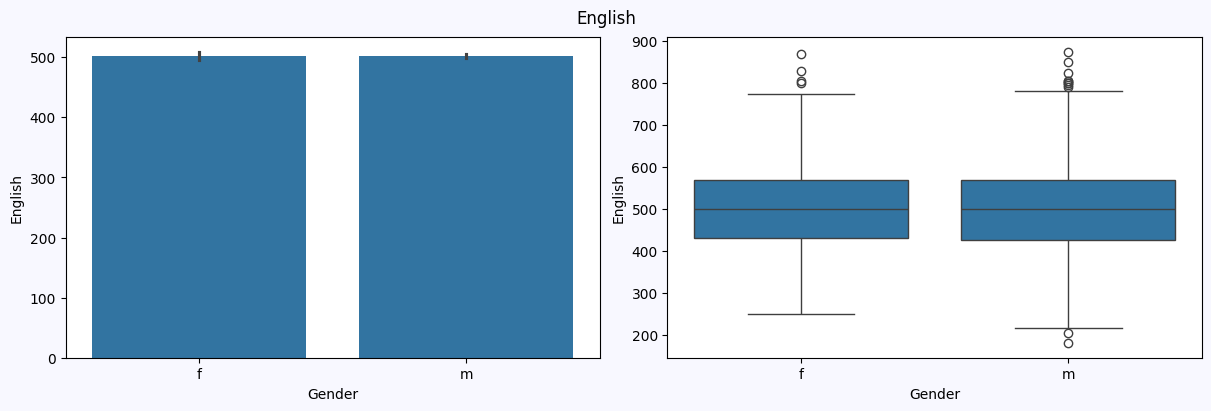


****************************** Gender Vs Logical ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,499.89,82.34,255.0,445.0,500.0,555.0,705.0
m,3041.0,502.14,88.14,195.0,445.0,505.0,565.0,795.0


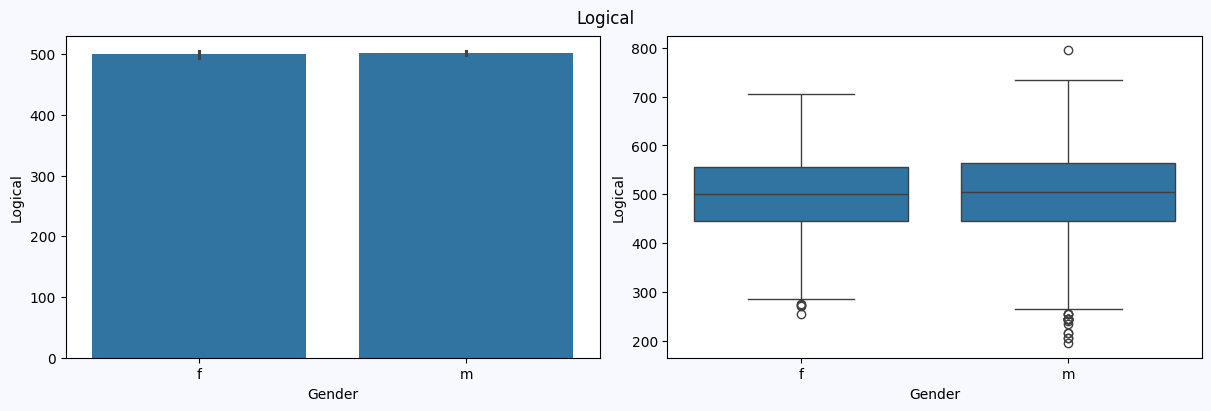


****************************** Gender Vs Quant ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,492.36,116.25,135.0,415.0,494.0,575.0,825.0
m,3041.0,519.99,123.43,120.0,435.0,525.0,605.0,900.0


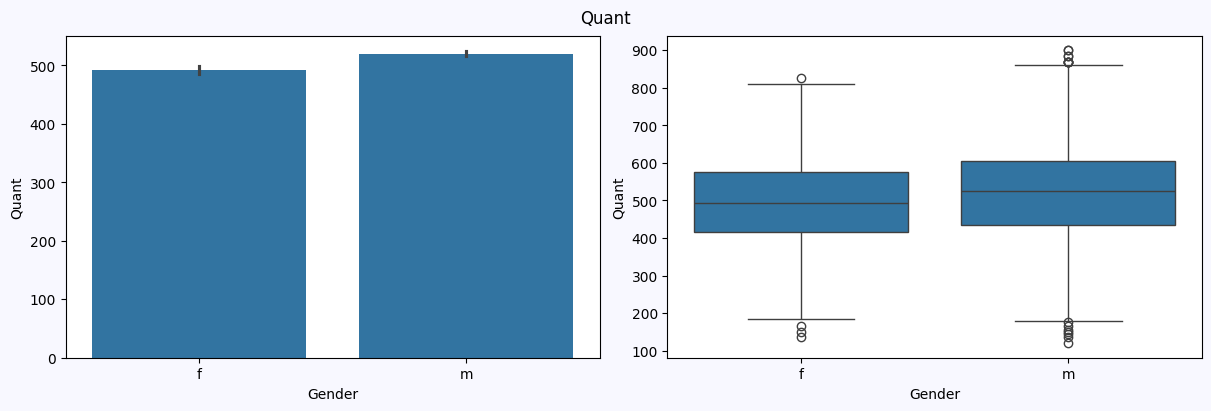


****************************** Gender Vs Domain ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,0.60,0.26,0.01,0.38,0.62,0.82,1.0
m,3041.0,0.61,0.27,0.00,0.41,0.62,0.84,1.0


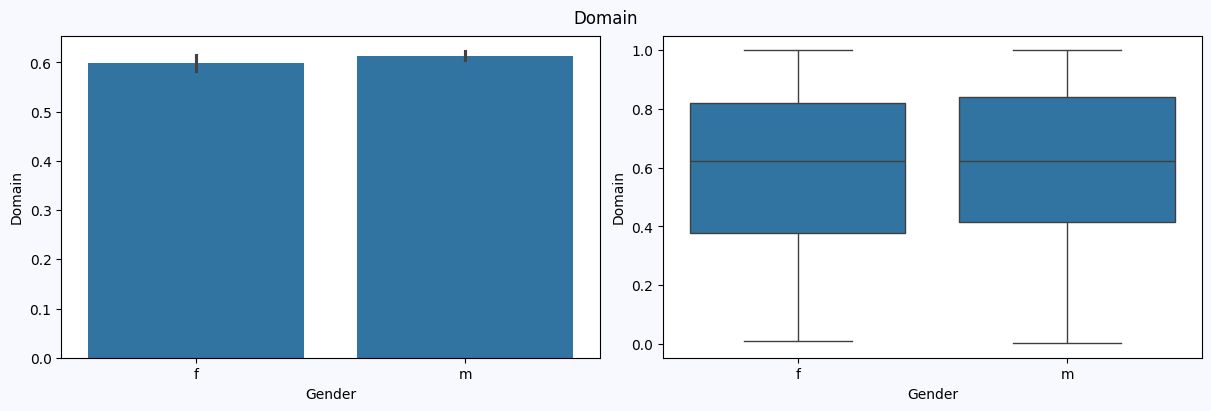


****************************** Gender Vs ComputerProgramming ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,362.54,185.67,-1.0,335.0,415.0,475.0,745.0
m,3041.0,350.13,211.11,-1.0,265.0,415.0,495.0,840.0


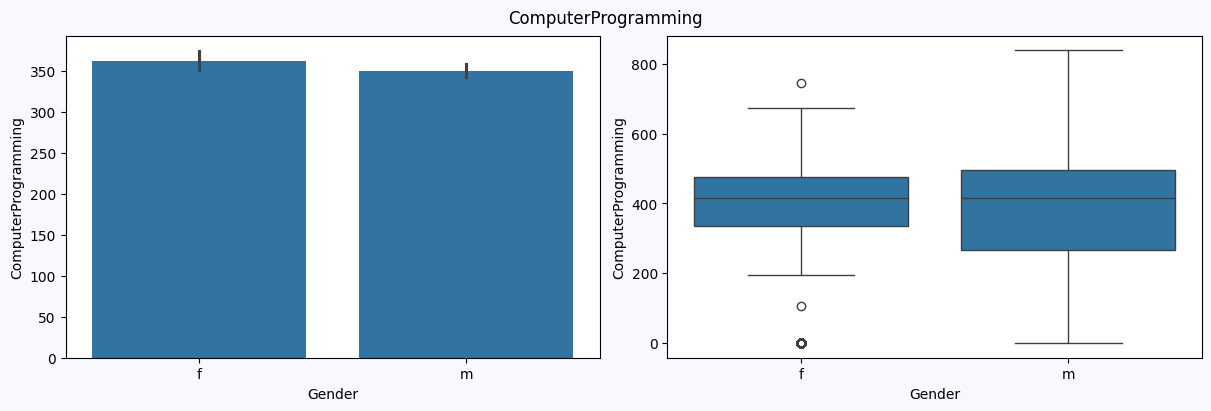


****************************** Gender Vs ElectronicsAndSemicon ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,91.79,154.41,-1.0,-1.0,-1.0,233.0,612.0
m,3041.0,96.44,159.44,-1.0,-1.0,-1.0,233.0,612.0


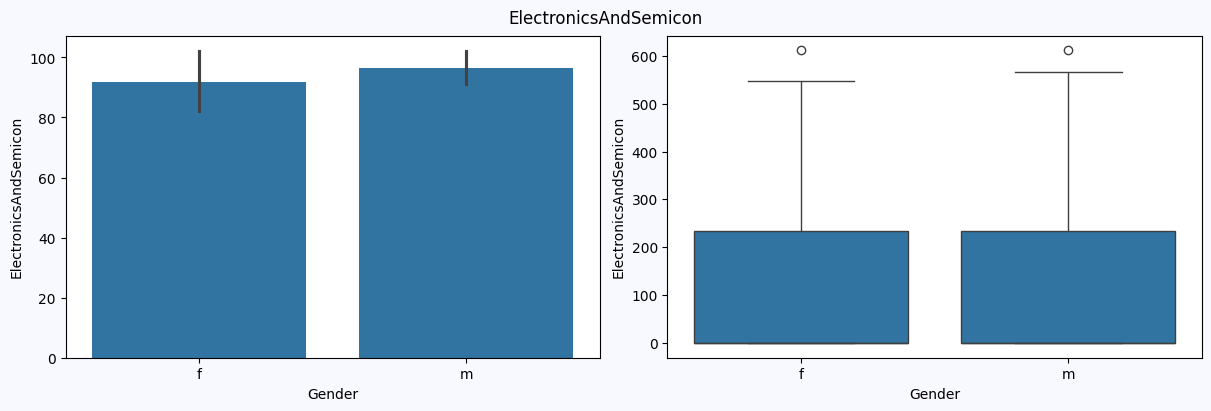


****************************** Gender Vs ComputerScience ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,91.5,174.39,-1.0,-1.0,-1.0,-1.0,715.0
m,3041.0,90.5,175.58,-1.0,-1.0,-1.0,-1.0,715.0


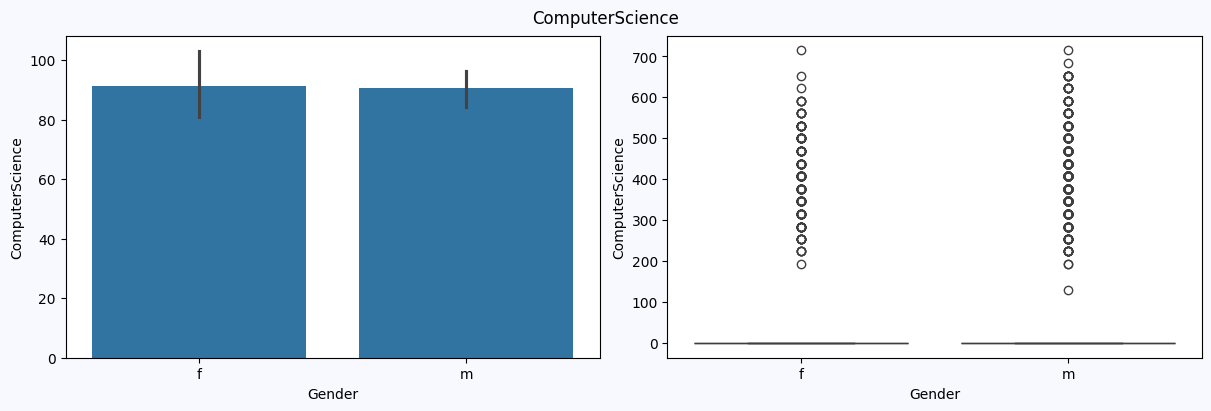


****************************** Gender Vs MechanicalEngg ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,6.46,56.30,-1.0,-1.0,-1.0,-1.0,606.0
m,3041.0,28.17,107.47,-1.0,-1.0,-1.0,-1.0,623.0


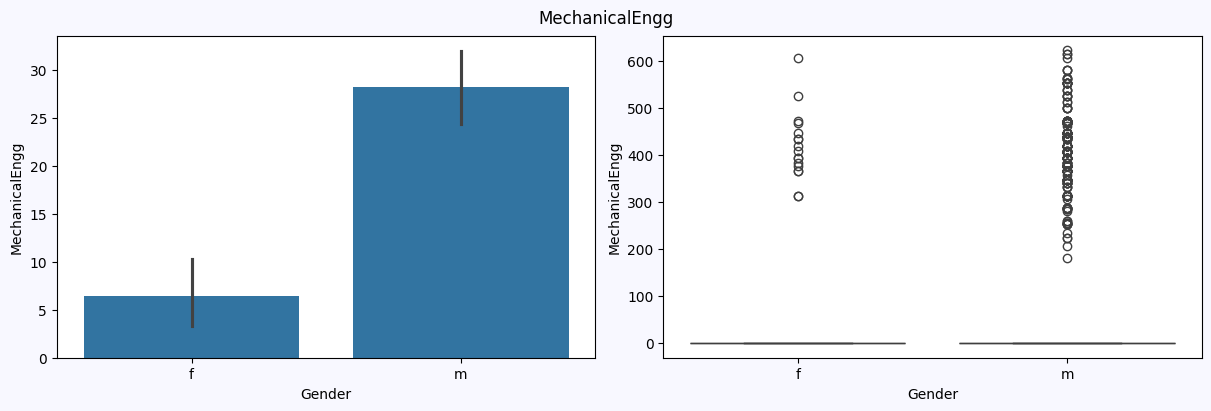


****************************** Gender Vs ElectricalEngg ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,12.07,75.27,-1.0,-1.0,-1.0,-1.0,633.0
m,3041.0,17.87,91.09,-1.0,-1.0,-1.0,-1.0,676.0


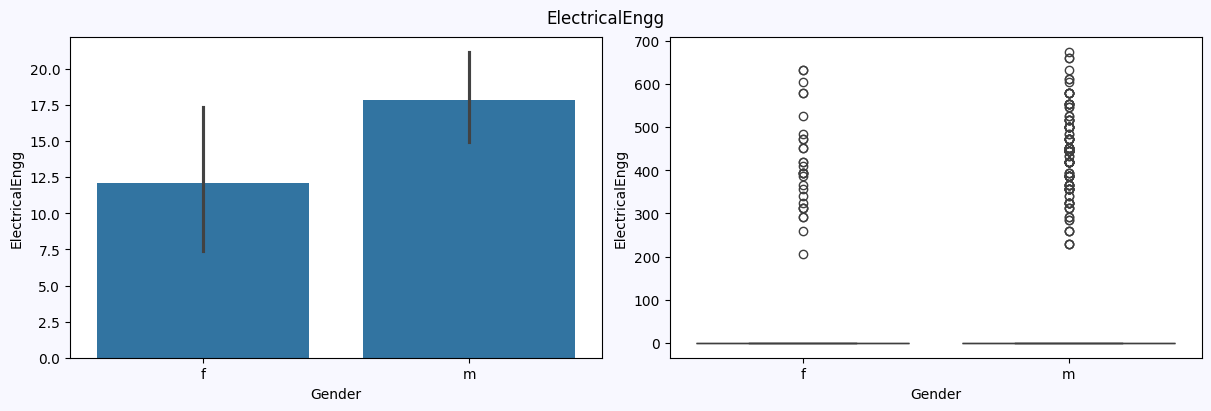


****************************** Gender Vs TelecomEngg ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,34.24,109.11,-1.0,-1.0,-1.0,-1.0,526.0
m,3041.0,31.10,103.48,-1.0,-1.0,-1.0,-1.0,548.0


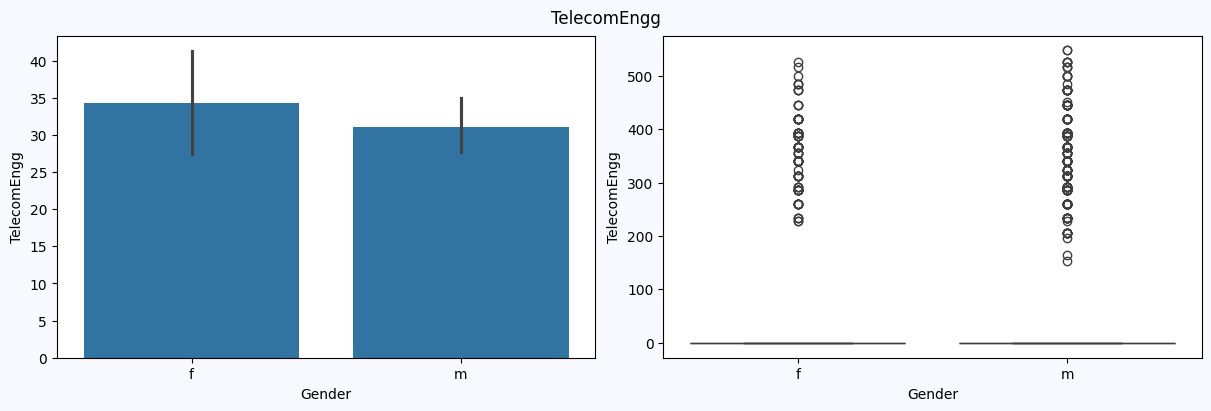


****************************** Gender Vs CivilEngg ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,1.84,33.52,-1.0,-1.0,-1.0,-1.0,500.0
m,3041.0,2.95,37.59,-1.0,-1.0,-1.0,-1.0,516.0


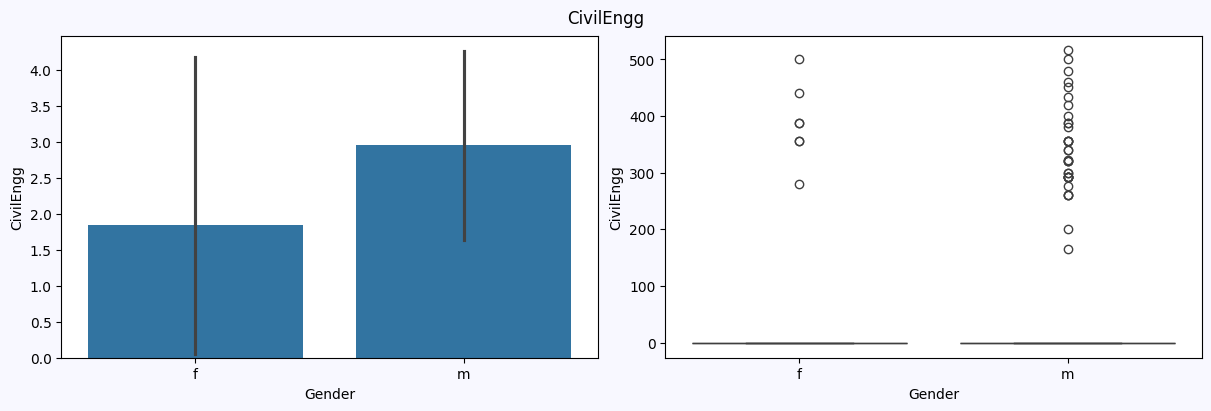


****************************** Gender Vs conscientiousness ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,0.12,0.95,-3.89,-0.45,0.27,0.85,2.0
m,3041.0,-0.09,1.05,-4.13,-0.73,-0.02,0.70,2.0


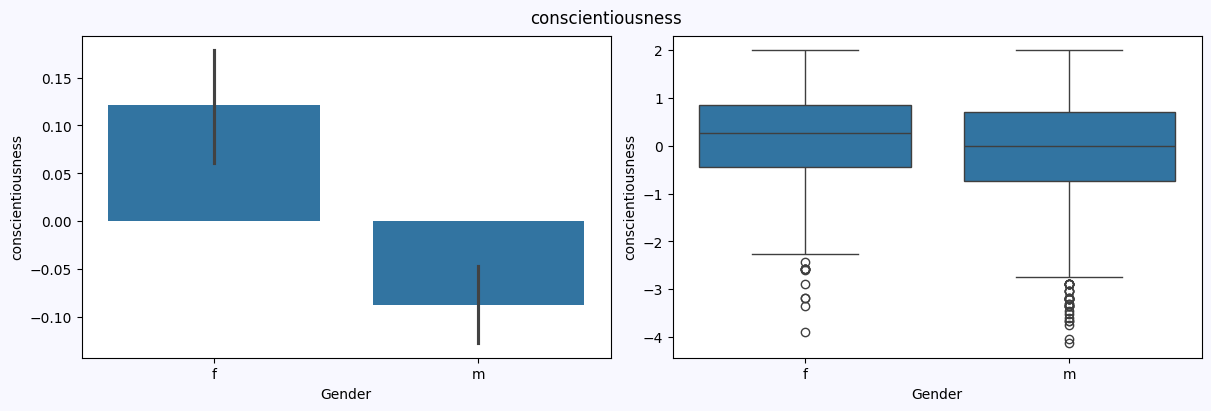


****************************** Gender Vs agreeableness ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,0.29,0.89,-5.62,-0.20,0.38,0.88,1.9
m,3041.0,0.10,0.95,-5.78,-0.44,0.21,0.71,1.9


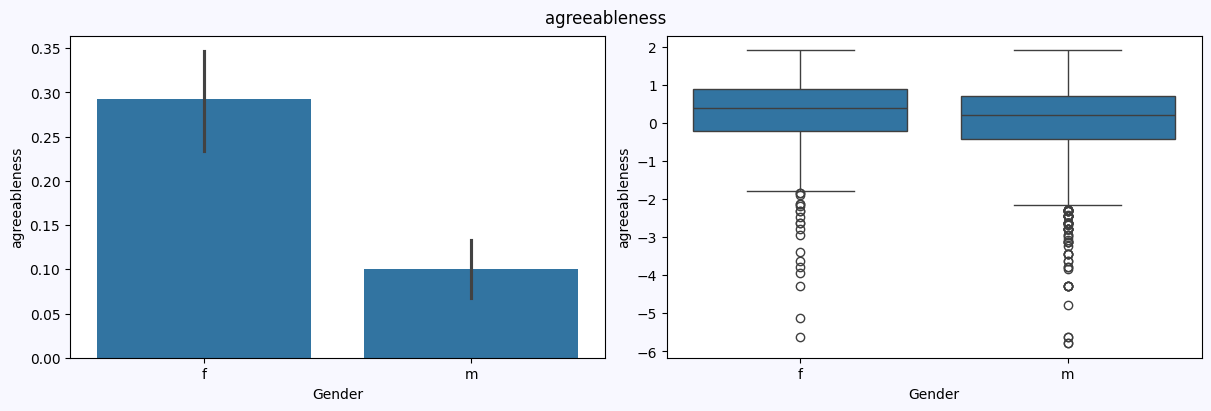


****************************** Gender Vs extraversion ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,0.01,0.94,-3.99,-0.6,0.09,0.67,2.16
m,3041.0,-0.00,0.95,-4.60,-0.6,0.09,0.62,2.54


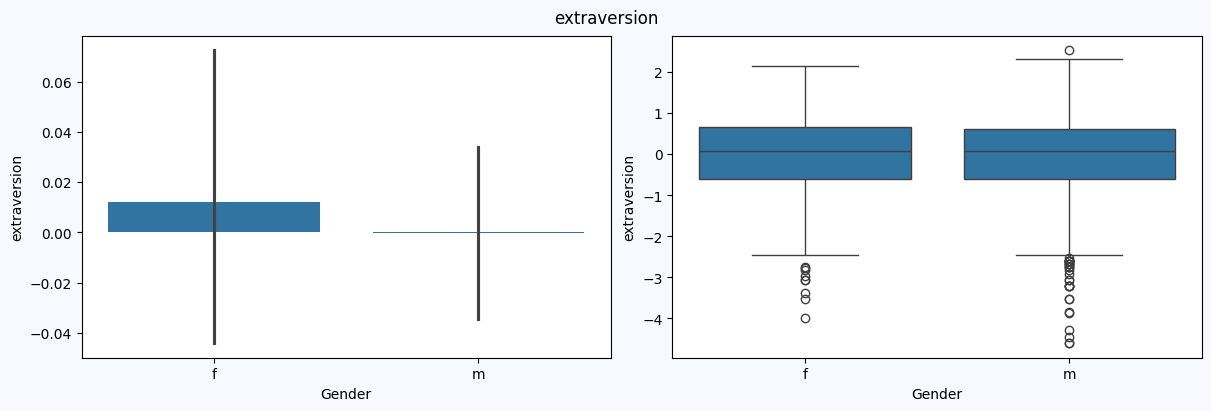


****************************** Gender Vs nueroticism ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,-0.18,1.01,-2.64,-0.88,-0.23,0.53,2.76
m,3041.0,-0.17,1.01,-2.64,-0.87,-0.17,0.53,3.35


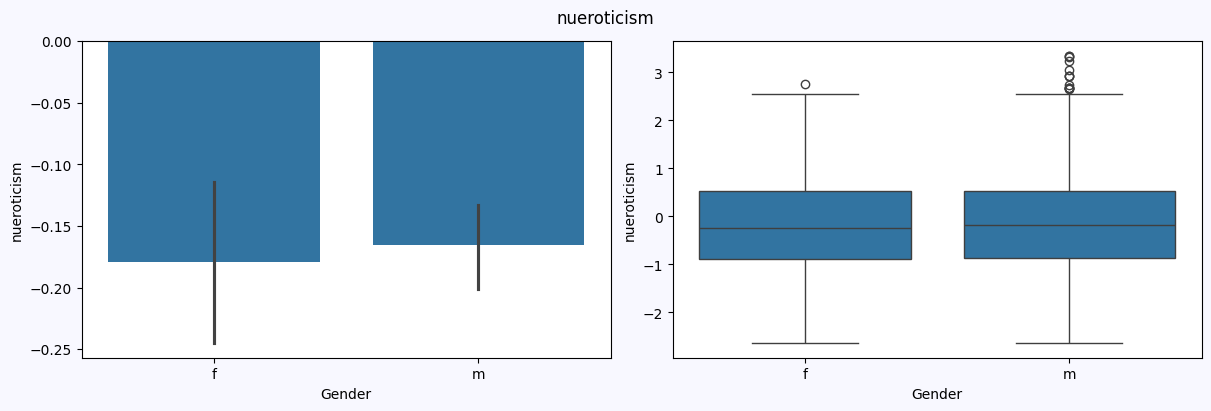


****************************** Gender Vs openess_to_experience ******************************


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,0.04,0.94,-6.61,-0.45,0.10,0.67,1.82
m,3041.0,-0.19,1.02,-7.38,-0.67,-0.09,0.48,1.63


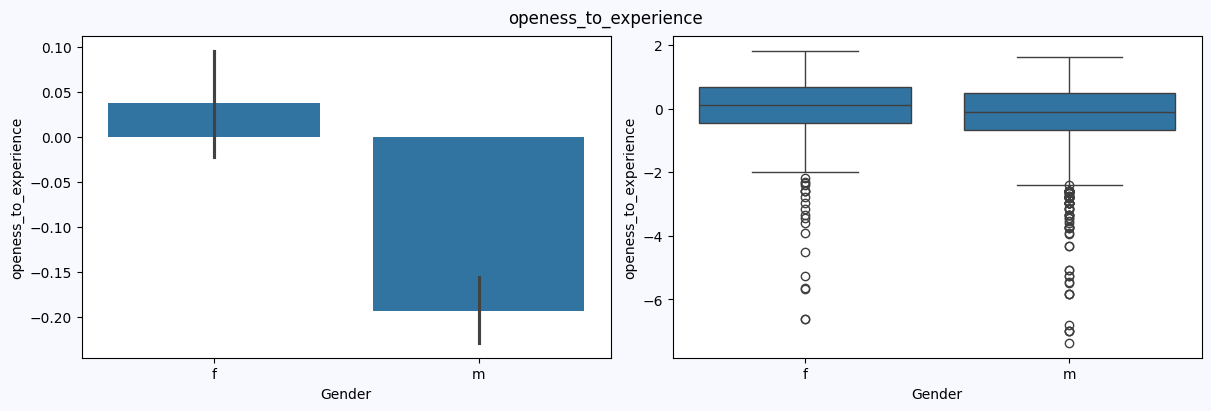

In [108]:
for col in amcat_scores:
    print('*'*30,'Gender Vs',col, '*'*30)
    display(data.groupby('Gender')[col].describe().round(2))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), facecolor='ghostwhite', constrained_layout=True)
    sns.barplot(x='Gender', y=col, data=data, ax=ax1)
    sns.boxplot(x='Gender', y=col, data=data, ax=ax2)
    plt.suptitle(col)
    plt.show()
    print()

In [109]:
order = data.groupby('Job_Role')['Salary'].mean().sort_values().index

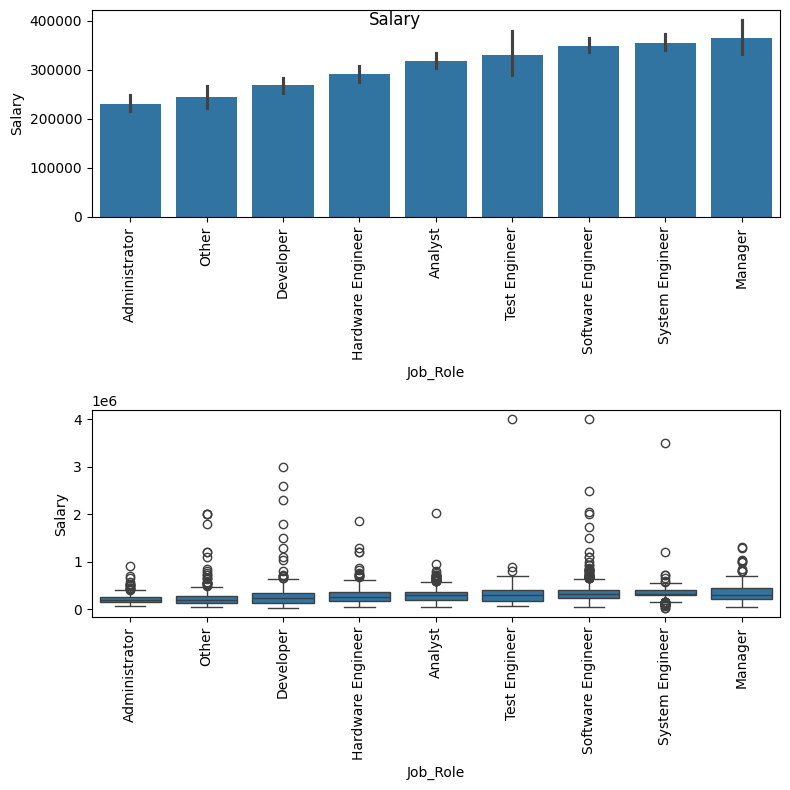

In [110]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.barplot(x='Job_Role', y='Salary', data=data, order=order, ax=ax1)
sns.boxplot(x='Job_Role', y='Salary', data=data, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('Salary')
plt.show()

In [111]:
filtered_df = data[data['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]


In [112]:
average_salary = filtered_df['Salary'].mean()
print(f'The average salary for these roles is: {average_salary}')

The average salary for these roles is: 339790.4624277457


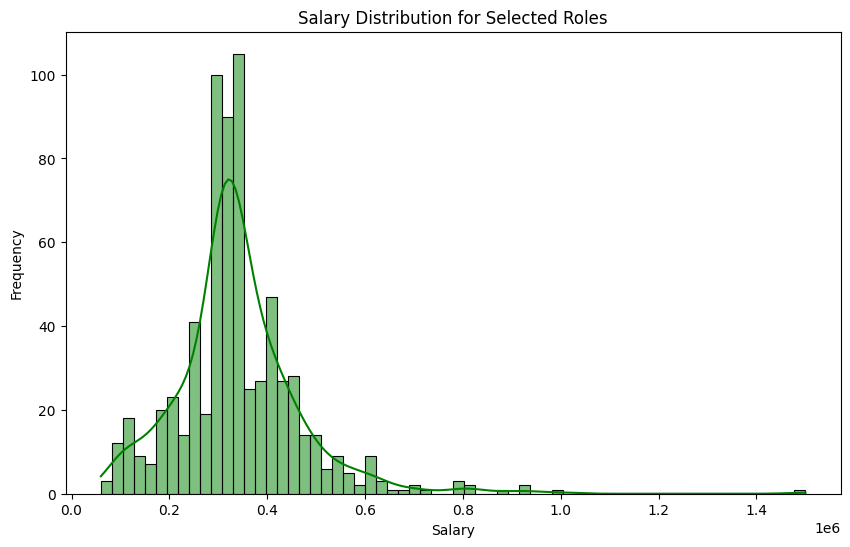

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_df, x="Salary", kde=True, color='green')
plt.title('Salary Distribution for Selected Roles')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [114]:
max_salary = filtered_df['Salary'].max()

In [115]:
if max_salary >= 250000 and max_salary <= 300000:
    print("Fail to Reject Null Hypothesis (H1): The claim that Recent graduates can earn between 2.5 - 3 lakhs is supported by the data.")
else:
    print("Reject Null Hypothesis (H0): The claim that Recent graduates can earn between 2.5 - 3 lakhs is not supported by the data.")

Reject Null Hypothesis (H0): The claim that Recent graduates can earn between 2.5 - 3 lakhs is not supported by the data.


## Conclusions

- The data reveals a gender imbalance, indicating a need for diversity efforts in the workforce.
- Technical skills, particularly in Computer Science and Engineering, are in high demand based on the prevalence of related degrees.
- Job roles vary widely, with Software Engineer being the most common, followed by Developer.
- Educational board preferences influence policies, with a preference for State Boards, CBSE, and ICSE.
- Technical expertise is crucial, as evidenced by the prevalence of Bachelor of Technology/Engineering graduates.
- Managerial and technical positions are the highest-earning roles.
- College tier impacts earnings, with Tier-1 graduates earning more.
- Gender-based salary differences exist, though further analysis is needed for clarity.
- The claim about recent graduates' earnings in Computer Science Engineering was not supported by the data.
- There's no significant link between gender and specialization preference, challenging assumptions about their correlation.
